**Due: 4 PM on Wednesday, 17 Feb 2016**

The usual warnings apply - the homework is not officially released until 11 Feb 2016, and we may make changes till then.

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Question 1 (20 points)**. 

Euclid's algorithm for finding the greatest common divisor of two numbers is

```python
gcd(a, 0) = a
gcd(a, b) = gcd(b, a modulo b)
```

- Write a function to find the greatest common divisor in Python (8 points)
- What is the greatest common divisor of 17384 and 1928? (2 point)
- Write a function to calculate the least common multiple (8 points)
- What is the least common multiple of 17384 and 1928? (2 point)

In [167]:
from math import sqrt

# greatest common divisor
def gcd(a,b):
    c = min(a,b)
    d = max(a,b)
    if c == 0:
        return d
    else:
        lst = filter(lambda i: c % i == 0, range(1, int(sqrt(c)) + 1))
        lst1 = []
        for i in lst:
            if d % i == 0:
                lst1.append(i)
        return max(lst1)
    
# greatest common divisor of 17384 and 1928
print("greatest common divisor: ", gcd(17384, 1928))

# Note that the product of gcd and lcm equals to a times b
def lcm(a,b):
    return a*b/gcd(a,b)

# The least common multiple of 17384 and 1928
print("least common multiple: ", lcm(17384, 1928))

greatest common divisor:  8
least common multiple:  4189544.0


**Question 2 (20 points)**. 

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformaton. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (48 points)

In [168]:
# Matrix A that represents the same linear transformaton
import numpy as np
A = np.array([[10,-10,16],
        [2,-5,20],
        [1,-4,13]]).T
A

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [189]:
# Compute the rank of A

# If it is invertible then the rank is 3
import scipy.linalg as la
if np.linalg.det(A) != 0:
    print("rank: ", A.shape[1])
    
# Check if they are linear independent, if so, rank is 3
b = np.array([0,0,0])
x = la.solve(A, b)
if all(x == np.array([ 0, 0, 0])):
    print("rank: ", A.shape[1])

rank:  3
rank:  3


In [170]:
# Eigenvalues and eigenvectors
eval, evec = la.eig(A)
print("eigenvalues are ", eval)
print("eigenvectors are: ", evec[:,0])
print(evec[:,1])
print(evec[:,2])

eigenvalues are  [ 9.+0.j  3.+0.j  6.+0.j]
eigenvectors are:  [-0.57735027  0.57735027 -0.57735027]
[ -1.40040956e-16   4.47213595e-01  -8.94427191e-01]
[-0.12038585 -0.24077171  0.96308682]


In [171]:
# Inverse matrix
evec_inv = la.inv(evec)
# Matrix of the transformation with respect to the new basis
T = evec_inv.dot(A.dot(evec))        # B^{-1} A B 
print(T)

[[  9.00000000e+00   1.77635684e-15   8.88178420e-16]
 [  3.55271368e-15   3.00000000e+00   1.24344979e-14]
 [  3.55271368e-15  -2.66453526e-15   6.00000000e+00]]


**Exercise 3 (20 pts)**. Avodiing catastrophic cancellation.

Read the Wikipedia entry on [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance). Then answer the following problem:

The tail of the standard logistic distributon is given by $1 - F(t) = 1 - (1+e^{-t})^{-1}$.

- Define a function `f1` to calculate the tail probability of the logistic distribution using the formula given above
- Use [`sympy`](http://docs.sympy.org/latest/index.html) to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits
- Calculate the *relative error* of `f1` when $t = 25$ (The relative error is given by `abs(exact - approximate)/exact`)
- Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function `f2` using this formula. Calculate the *relative error* of `f2` when $t = 25$. 
- How much more accurate is `f2` compared with `f1` in terms of the relative error?

In [172]:
import numpy as np
from sympy import N

# Function f1
def f1(t):
    return 1-1/(1+np.exp(-t))

exact = N(1-1/(1+exp(-25)),21)

# relative error of f1 when t=25
f1_err = abs(exact - f1(25))/exact

In [173]:
# Function f2
def f2(t):
    return np.exp(-t)/(np.exp(-t) + 1)

# relative error of f2 when t=25
f2_err = abs(exact - f2(25))/exact

In [174]:
print("relative error of f1: ", f1_err)
print("relative error of f2: ", f2_err)
print("f2 is", f1_err/f2_err, "times accurate than f1")

relative error of f1:  0.00000417591476659826462849
relative error of f2:  2.31112527482187004059e-18
f2 is 1806875123599.74654378 times accurate than f1


**Exercise 4 (40 pts)**. One of the goals of the course it that you will be able to implement novel algorihtms from the literature. 

- Implement the mean-shift algorithm in 1D as described [here](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TUZEL1/MeanShift.pdf). 
    - Use the following function signature
    ```python
    def mean_shift(xs, x, kernel, max_iters=100, tol=1e-6):
    ```
    - xs is the data set, x is the starting location, and kernel is a kernel function
    - tol is the difference in $||x||$ across iterations
- Use the following kernels with bandwidth $h$ (a default value of 1.0 will work fine)
    - Flat - return 1 if $||x|| < h$ and 0 otherwise
    - Gaussian 
    $$\frac{1}{\sqrt{2 \pi h}}e^{\frac{-||x||^2}{h^2}}$$
    - Note that $||x||$ is the norm of the data point being evaluated minus the current value of $x$
- Use both kernels to find all 3 modes of the data set in `x1d.npy`
- Modify the algorihtm abd/or kernels so that it now works in an arbitrary number of dimensions.
- Uset both kernels to find all 3 modes of the data set in `x2d.npy`
- Plot the path of successive intermeidate solutions of the mean-shift algorithm starting from `x0 = (-4, 5)` until it converges onto a mode in the 2D data for each kernel. Superimposet the path on top of a contour plot of the data density. Repeat for `x0 = (0, 0)` and `x0 = (10, 10)` .

In [175]:
import numpy as np
X1 = np.load('x1d.npy')
X2 = np.load('x2d.npy')

# Flat Kernel
def flat(x):
    if np.linalg.norm(x)<h:
        return 1
    else:
        return 0

# Gaussian Kernel
def Gaussian(x):
    return np.exp(-np.linalg.norm(x)**2/(h**2))/np.sqrt(2*np.pi*h)


def mean_shift(xs, x, kernel, max_iters=100, tol=1e-6):
    new_mean = x
    mean_shifts = [x]
    for iters in range(1, max_iters + 1):
        Neighbourhood = [x for x in xs if np.linalg.norm(x-new_mean)<h]
        old_mean = new_mean
        m1 = sum([xi*kernel(xi-new_mean) for xi in Neighbourhood]) 
        m2 = sum([kernel(xi-new_mean) for xi in Neighbourhood])
        if m2 == 0:
            break
        else:
            new_mean = m1/m2
            
        # Record the shift path
        mean_shifts.append(new_mean)
        if np.linalg.norm(new_mean - old_mean) < tol:
            break
    return mean_shifts

In [176]:
# Get the range of X1 dataset
print("min: ", min(X1), ", max: ", max(X1))

min:  -7.96812570511 , max:  7.408254921


In [177]:
# Adjust h to get exactly 3 modes
h = 1.8
mode_flat1 = []
mode_Gaussian1 = []
for i in range(-8,9):
    mode_flat1.append(round(mean_shift(X1,i, flat, max_iters=100, tol=1e-6)[-1],5))
    mode_Gaussian1.append(round(mean_shift(X1,i, Gaussian, max_iters=100, tol=1e-6)[-1],5))
print('Modes of X1 in kernel flat ', np.unique(mode_flat1))
print('Modes of X2 in kernel Gaussian ', np.unique(mode_Gaussian1))

Modes of X1 in kernel flat  [-4.8728   0.21918  3.82058]
Modes of X2 in kernel Gaussian  [-4.9043   0.50004  3.85345]


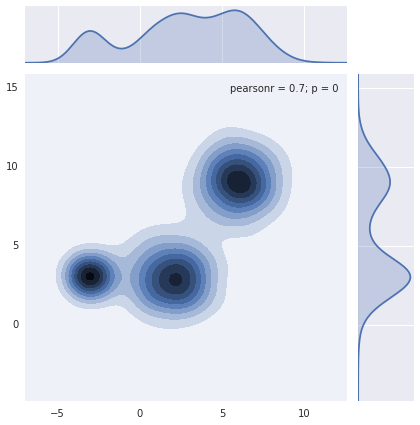

In [178]:
import seaborn as sns
# Check both the range and the starting points
sns.jointplot(x=X2[:,0], y=X2[:,1], data=X2, kind="kde")

In [179]:
# We start from the areas between neighbouring cores
# For flat kernel
h = 1
mod1 = []
for i in range(-3,1):
    for j in range(1,3):
        mode = mean_shift(X2,[i,j], flat, max_iters=100, tol=1e-6)
        if len(mode) == 1:
            break
        a = mode[-1].tolist()
        a = [round(i, 3) for i in a]
        mod1.append(a)
for i in range(6,8):
    for j in range(8,10):
        mode = mean_shift(X2,[i,j], flat, max_iters=100, tol=1e-6)
        if len(mode) == 1:
            break
        a = mode[-1].tolist()
        a = [round(i, 3) for i in a]
        mod1.append(a)

import collections
import itertools

counts = Counter()
for collab in mod1:
    for pair in itertools.combinations(collab, 2):
        counts[pair] += 1

# Find out the most common 3 points, which are modes
# We will get similar but the exactly the same modes, so we 
# can just take the most common ones to represent the results
counts.most_common(3)

[((2.3, 2.852), 4), ((-3.083, 3.054), 4), ((6.094, 8.881), 3)]

In [180]:
# For Gaussian Kernel, same as above
h = 1
mod2 = []
for i in range(-3,1):
    for j in range(1,3):
        mode = mean_shift(X2,[i,j], Gaussian, max_iters=100, tol=1e-6)
        if len(mode) == 1:
            break
        a = mode[-1].tolist()
        a = [round(i, 3) for i in a]
        mod2.append(a)
for i in range(6,8):
    for j in range(8,10):
        mode = mean_shift(X2,[i,j], Gaussian, max_iters=100, tol=1e-6)
        if len(mode) == 1:
            break
        a = mode[-1].tolist()
        a = [round(i, 3) for i in a]
        mod2.append(a)


counts = Counter()
for collab in mod2:
    for pair in itertools.combinations(collab, 2):
        counts[pair] += 1

counts.most_common(3)

[((-3.085, 3.056), 4), ((6.091, 8.877), 3), ((2.318, 2.832), 3)]

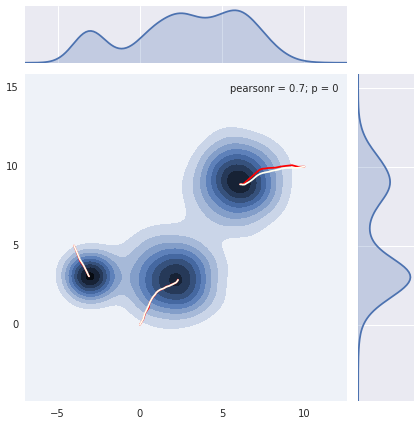

In [188]:
# Plot paths for flat kernels
contour = sns.jointplot(x=X2[:,0], y=X2[:,1], data=X2, kind="kde")
trace1 = np.array(mean_shift(X2,[-4,5], flat, max_iters=100, tol=1e-6))
trace2 = np.array(mean_shift(X2,[0,0], flat, max_iters=100, tol=1e-6))
trace3 = np.array(mean_shift(X2,[10,10], flat, max_iters=100, tol=1e-6))
contour.ax_joint.plot(trace1[:,0],trace1[:,1],c='red')
contour.ax_joint.plot(trace2[:,0],trace2[:,1],c='red')
contour.ax_joint.plot(trace3[:,0],trace3[:,1],c='red')
# Plot paths for Gaussian kernels
trace1 = np.array(mean_shift(X2,[-4,5], Gaussian, max_iters=100, tol=1e-6))
trace2 = np.array(mean_shift(X2,[0,0], Gaussian, max_iters=100, tol=1e-6))
trace3 = np.array(mean_shift(X2,[10,10], Gaussian, max_iters=100, tol=1e-6))
contour.ax_joint.plot(trace1[:,0],trace1[:,1],c='ivory')
contour.ax_joint.plot(trace2[:,0],trace2[:,1],c='ivory')
contour.ax_joint.plot(trace3[:,0],trace3[:,1],c='ivory')